In [39]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [40]:
df = pd.read_csv(r"C:\Users\svire\Downloads\Fraud_check (1).csv")

In [41]:
df.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [42]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [43]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [44]:
df.shape

(600, 6)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [46]:
df[df.duplicated()]

Empty DataFrame
Columns: [Undergrad, Marital.Status, Taxable.Income, City.Population, Work.Experience, Urban]
Index: []

In [47]:
df.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [48]:
(df['Taxable.Income']<=30000).value_counts()

Taxable.Income
False    476
True     124
Name: count, dtype: int64

In [49]:
df1=df.copy()
df1['taxable_category'] = pd.cut(x = df1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
df1.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban taxable_category  
0   YES             Good  
1   YES             Good  
2   YES             Good  
3   YES             Good  
4    NO             Good

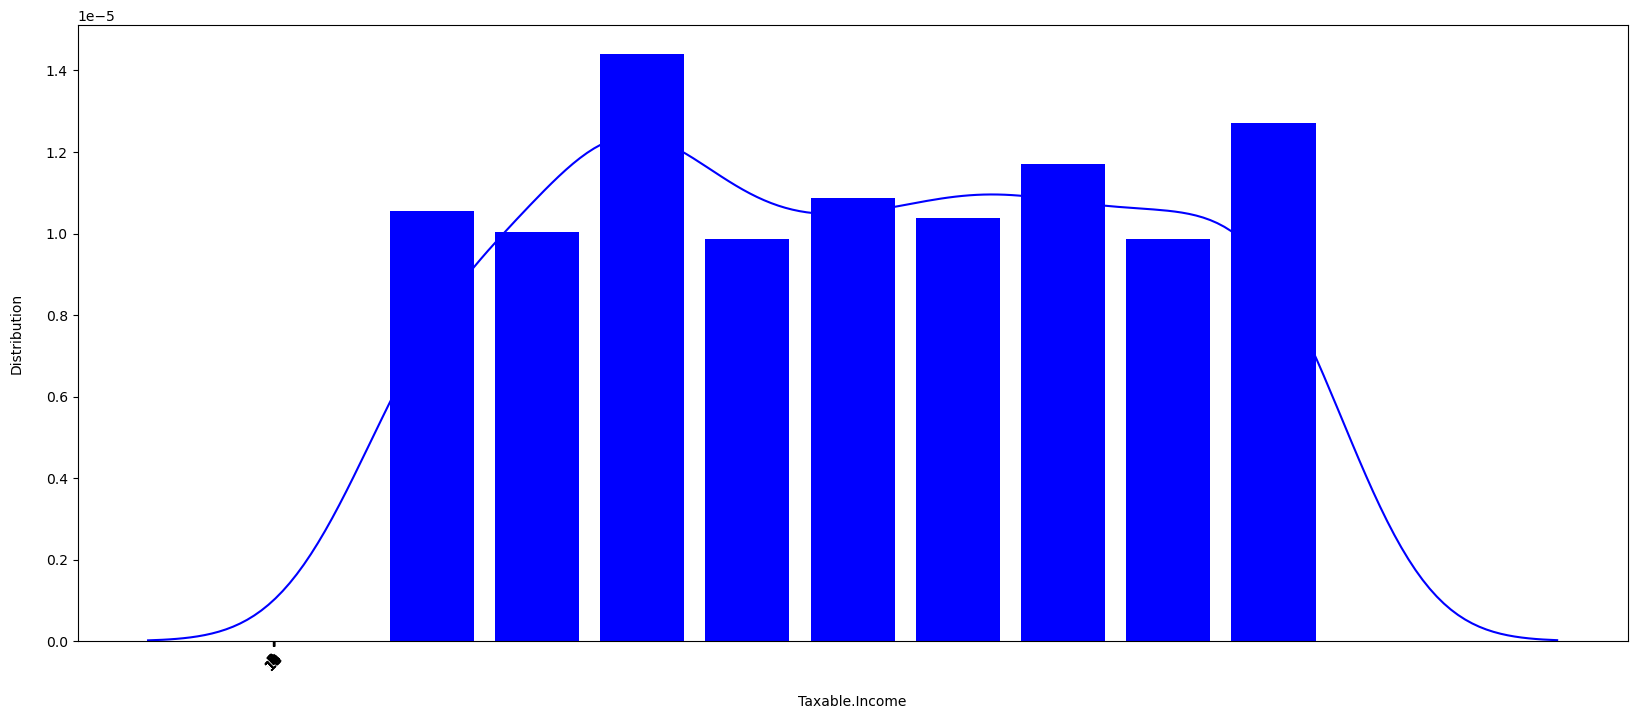

In [50]:
def distplot(param):
    plt.figure(figsize=(20,8))
    sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Taxable.Income")

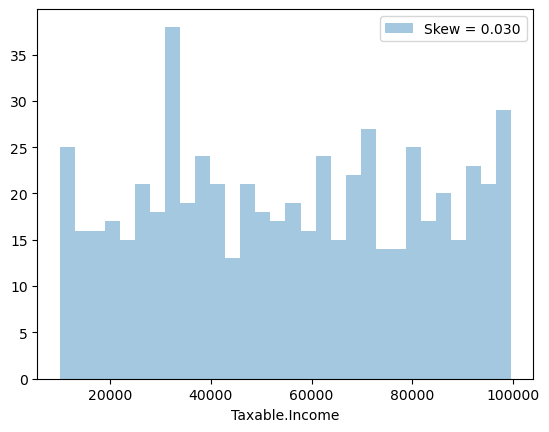

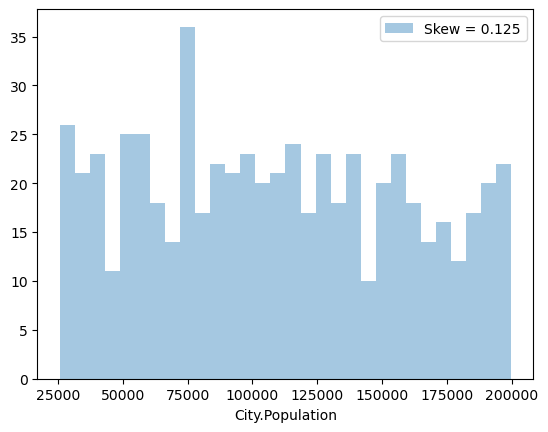

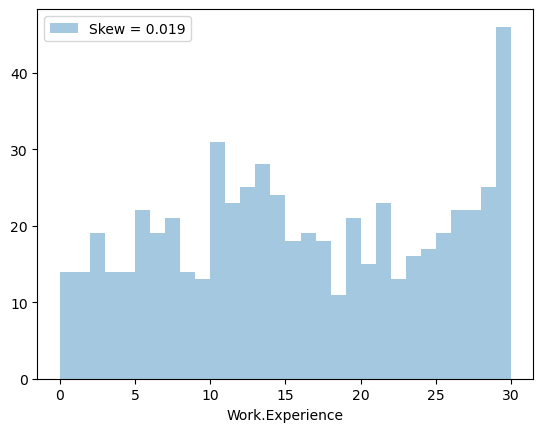

In [51]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

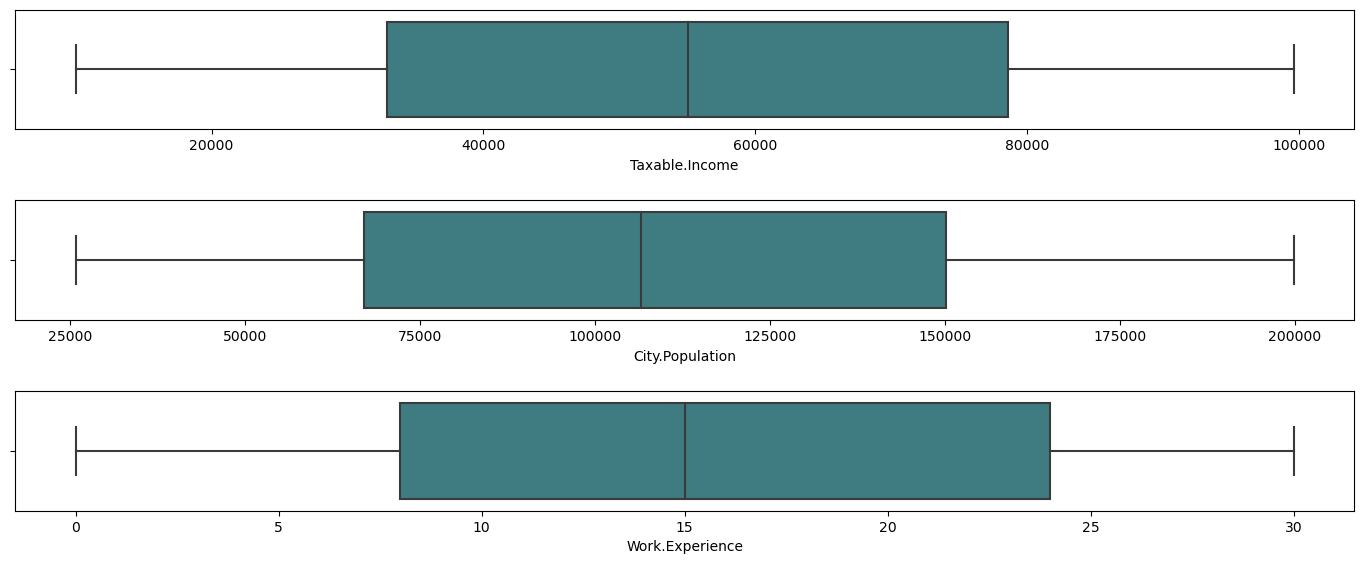

In [52]:
ot=df.copy() 
fig, axes=plt.subplots(3,1,figsize=(14,6),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='City.Population',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data=ot,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)

<Axes: >

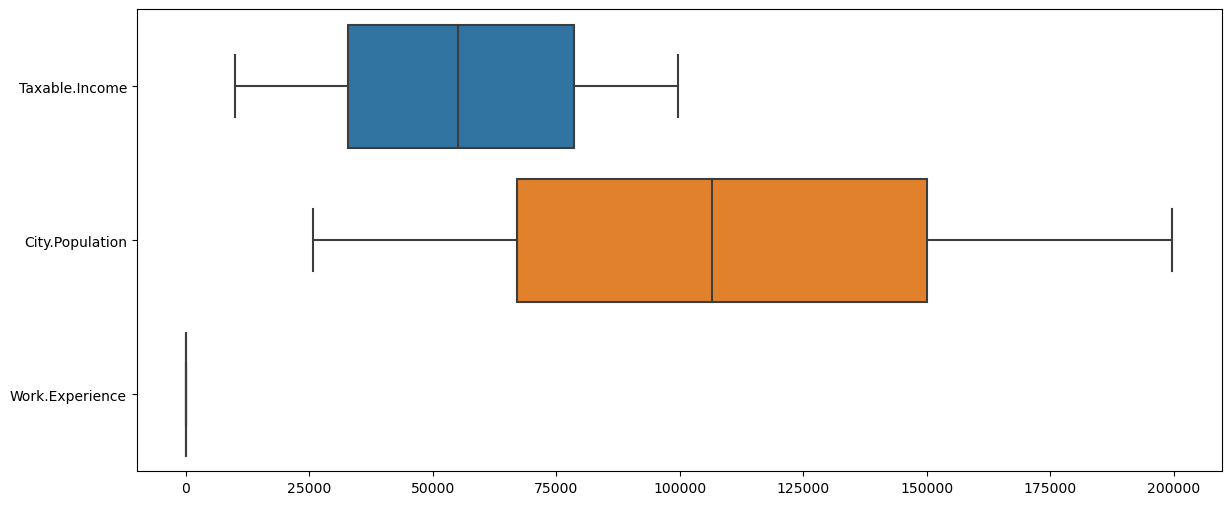

In [53]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numerical_features], orient="h")

<Figure size 800x800 with 0 Axes>

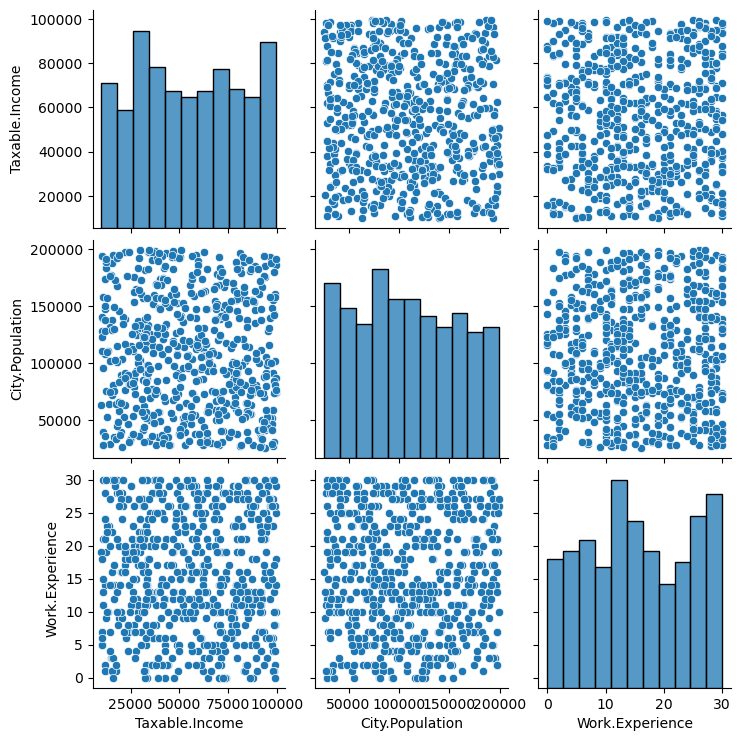

In [54]:
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='coolwarm')
plt.show()

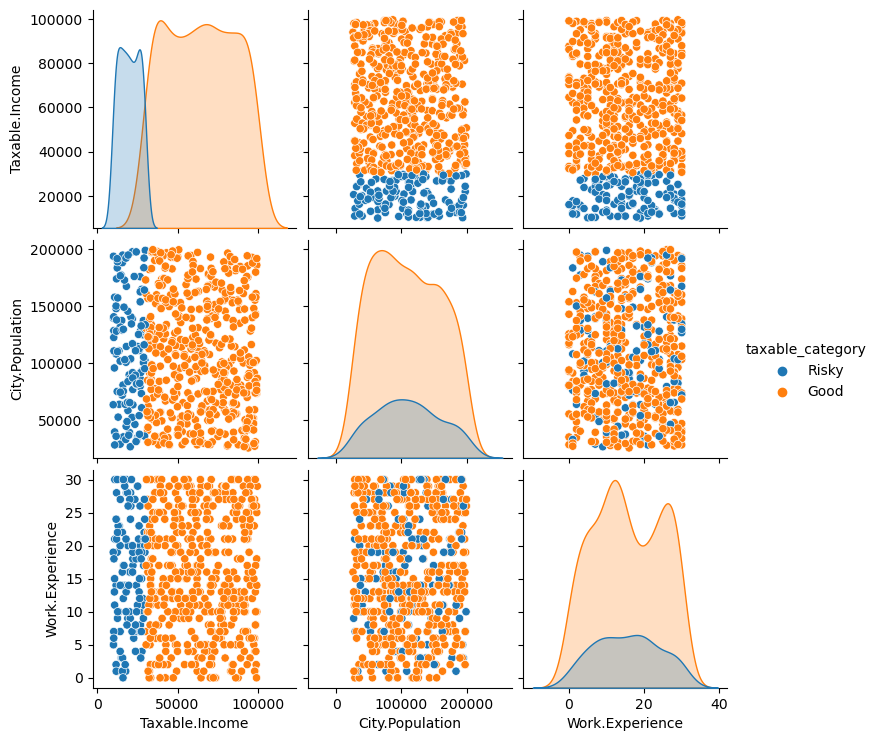

In [55]:
sns.pairplot(data=df1, hue = 'taxable_category')

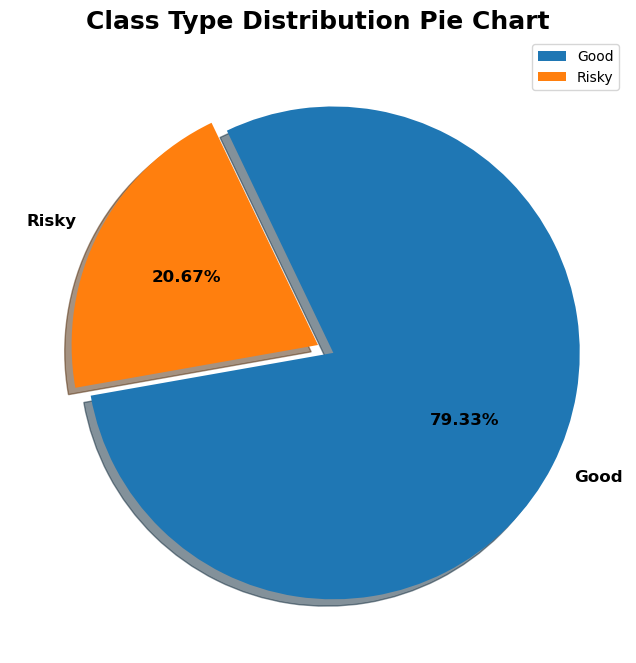

In [56]:
plt.figure(figsize = (12,8))
plt.pie(df1['taxable_category'].value_counts(),
       labels=df1.taxable_category.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [57]:
le=LabelEncoder()
df["Undergrad"]=le.fit_transform(df["Undergrad"])
df["Undergrad"].unique()

array([0, 1])

In [58]:
le=LabelEncoder()
df["Urban"]=le.fit_transform(df["Urban"])
df["Urban"].unique()

array([1, 0])

In [59]:
le=LabelEncoder()
df["Marital.Status"]=le.fit_transform(df["Marital.Status"])
df["Marital.Status"].unique()

array([2, 0, 1])

In [60]:
df

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0            0               2           68833            50047   
1            1               0           33700           134075   
2            0               1           36925           160205   
3            1               2           50190           193264   
4            0               1           81002            27533   
..         ...             ...             ...              ...   
595          1               0           76340            39492   
596          1               0           69967            55369   
597          0               0           47334           154058   
598          1               1           98592           180083   
599          0               0           96519           158137   

     Work.Experience  Urban  
0                 10      1  
1                 18      1  
2                 30      1  
3                 15      1  
4                 28      0  
..               ...    ...  
595                7      1  
596                2      1  
597                0      1  
598               17      0  
599               16      0  

[600 rows x 6 columns]

In [61]:
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
array=df.values
X=array[:,[0,1,3,4,5]]
Y=array[:,2]
num_trees=200
kfold=KFold(n_splits=3,random_state=3,shuffle=True)
model=RandomForestClassifier(n_estimators=num_trees,max_depth=3,min_samples_leaf=3,max_features='sqrt')
results=cross_val_score(model,X,Y,cv=kfold)
print(results)

[0. 0. 0.]


In [62]:
X,Y

(array([[     0,      2,  50047,     10,      1],
        [     1,      0, 134075,     18,      1],
        [     0,      1, 160205,     30,      1],
        ...,
        [     0,      0, 154058,      0,      1],
        [     1,      1, 180083,     17,      0],
        [     0,      0, 158137,     16,      0]], dtype=int64),
 array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
        98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
        97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
        87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
        10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
        81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
        81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
        51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
        41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
        35610, 66564, 87348, 6909

In [63]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier(random_state=25,n_jobs=-1)
params={
    'max_depth':[2,3,5,'None'],
    'min_samples_leaf':[5,10,20],
    'n_estimators':[50,100,200,250]
}
grid_search=GridSearchCV(estimator=rf,param_grid=params,cv=2,n_jobs=-1,verbose=2,scoring="accuracy")
grid_search.fit(X,Y)


Fitting 2 folds for each of 48 candidates, totalling 96 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 'None'],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 250]},
             scoring='accuracy', verbose=2)

In [64]:
print(grid_search.best_params_)
print(grid_search.best_score_)
grid_search.best_estimator_

{'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 50}
0.0


RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=25)

In [65]:
model.fit(X,Y)
model.feature_importances_

array([0.07402263, 0.13516781, 0.40049812, 0.30996035, 0.08035109])

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree

In [67]:
kfold=KFold(n_splits=3,random_state=3,shuffle=True)
model=AdaBoostClassifier(n_estimators=3,random_state=3)
results=cross_val_score(model,X,Y,cv=kfold)
print(results.mean())


0.0


In [68]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

In [69]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
kfold=KFold(n_splits=3,random_state=3,shuffle=True)
estimators=[]
model1=LogisticRegression(max_iter=20)
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('decision_tree',model2))
model3=SVC()
estimators.append(('svm',model3))


In [70]:
ensemble = VotingClassifier(estimators)
results_voting = cross_val_score(ensemble, X, Y, cv=kfold)

In [71]:
results_voting

array([0., 0., 0.])

In [72]:
results_voting.mean()

0.0